# 🧠 Machine Learning for Diabetes Prediction
This part of the notebook continues from the exploratory data analysis and preprocessing phase. We will use the cleaned dataset to build, train, and evaluate several machine learning models to predict the onset of diabetes.

+ The steps we will follow are:

    1. Load the preprocessed data.

    2. Separate features (X) and the target variable (y).

    3. Split the data into training and testing sets.

    4. Apply feature scaling to normalize the data.

    5. Train and evaluate three different classification models:

        - Logistic Regression (a good baseline).

        - K-Nearest Neighbors (a simple, non-parametric model).

        - Random Forest (a powerful ensemble model).

    6. Compare the models based on their performance metrics.

    7. Conclude with the best-performing model and suggest future improvements.

## 📚 Importing Libraries for Machine Learning

In [11]:
# Import libraries for data manipulation, visualization, and statistical analysis.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for machine learning models and evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## 📂 Step 1: Load the Preprocessed Dataset

In [4]:
# Load the cleaned and preprocessed dataset
df_ml = pd.read_csv('Diabetes-dataset_FS.csv')

# Display the first few rows to confirm it's loaded correctly
df_ml.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,125,33.6,0.6270,50,1
1,85,66,29,125,26.6,0.3510,31,0
2,183,64,29,125,23.3,0.6720,32,1
3,89,66,23,125,28.1,0.1670,21,0
4,137,40,35,125,43.1,0.3725,33,1


## 🔪 Step 2: Separate Features (X) and Target (y)

In [5]:
# X contains all the feature columns (everything except 'Outcome')
X = df_ml.drop('Outcome', axis=1)

# y contains only the target variable
y = df_ml['Outcome']

# Print the shapes to confirm
print("Shape of features (X):", X.shape)
print("Shape of target (y):", y.shape)

Shape of features (X): (768, 7)
Shape of target (y): (768,)


To prepare for modeling, we need to separate our data into the features (the diagnostic measurements) and the target variable (Outcome).

## ⚡ Step 3: Split Data into Training and Testing Sets

In [6]:
# Split the data into 80% for training and 20% for testing
# random_state ensures reproducibility of the split
# stratify=y ensures the proportion of outcomes is the same in both sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

It's crucial to evaluate our models on data they have never seen before. We'll split our dataset into a training set (to build the model) and a testing set (to evaluate its performance). We use stratify=y to ensure that both the training and testing sets have a similar proportion of diabetes cases, which is important for imbalanced datasets.

## ⚖️ Step 4: Feature Scaling

In [7]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Use the same scaler to transform the testing data
X_test_scaled = scaler.transform(X_test)

Our features have different scales (e.g., Age vs. DiabetesPedigreeFunction). Many machine learning algorithms perform better when the input features are on a similar scale. We'll use StandardScaler to standardize the features (mean=0, std=1).

## 🤖 Step 5: Model Training and Evaluation

Now we'll train three different models and evaluate their performance using key metrics like accuracy, the confusion matrix, and a classification report (which includes precision, recall, and F1-score).

### Model 1: Logistic Regression

This is a great linear model to use as a baseline. It's simple, fast, and highly interpretable.

In [8]:
# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Evaluate the model
print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log_reg))

Logistic Regression Results:
Accuracy: 0.7207792207792207

Confusion Matrix:
 [[82 18]
 [25 29]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.82      0.79       100
           1       0.62      0.54      0.57        54

    accuracy                           0.72       154
   macro avg       0.69      0.68      0.68       154
weighted avg       0.71      0.72      0.72       154



### Model 2: K-Nearest Neighbors (KNN)

KNN is a non-parametric model that classifies a data point based on the majority class of its 'k' nearest neighbors. The choice of 'k' is important, but we'll start with a common value of 5.

In [9]:
# Initialize and train the K-Nearest Neighbors model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_knn = knn.predict(X_test_scaled)

# Evaluate the model
print("K-Nearest Neighbors (KNN) Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))

K-Nearest Neighbors (KNN) Results:
Accuracy: 0.7402597402597403

Confusion Matrix:
 [[84 16]
 [24 30]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.84      0.81       100
           1       0.65      0.56      0.60        54

    accuracy                           0.74       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.74      0.73       154



### Model 3: Random Forest Classifier

Random Forest is a powerful ensemble learning method that builds multiple decision trees and merges them to get a more accurate and stable prediction. It's often very effective with little tuning.

In [10]:
# Initialize and train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_rf = rf.predict(X_test_scaled)

# Evaluate the model
print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Results:
Accuracy: 0.7467532467532467

Confusion Matrix:
 [[83 17]
 [22 32]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.83      0.81       100
           1       0.65      0.59      0.62        54

    accuracy                           0.75       154
   macro avg       0.72      0.71      0.72       154
weighted avg       0.74      0.75      0.74       154



## 📊 Step 6: Model Comparison

                 Model  Accuracy
2        Random Forest  0.746753
1  K-Nearest Neighbors  0.740260
0  Logistic Regression  0.720779


C:\Users\ASUS\AppData\Local\Temp\ipykernel_13852\3654662784.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=accuracy_df_sorted, palette='RdPu')


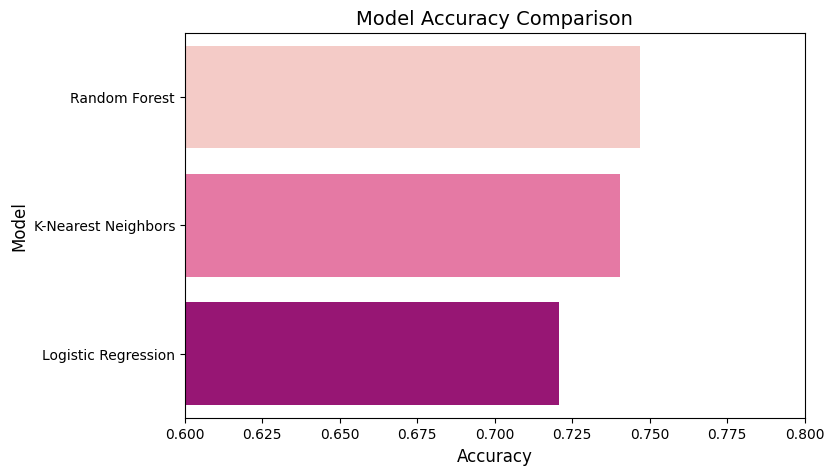

In [12]:
# Create a dictionary to store the accuracy scores
model_accuracies = {
    'Logistic Regression': accuracy_score(y_test, y_pred_log_reg),
    'K-Nearest Neighbors': accuracy_score(y_test, y_pred_knn),
    'Random Forest': accuracy_score(y_test, y_pred_rf)
}

# Convert to a pandas DataFrame for better visualization
accuracy_df = pd.DataFrame(list(model_accuracies.items()), columns=['Model', 'Accuracy'])
accuracy_df_sorted = accuracy_df.sort_values(by='Accuracy', ascending=False)

# Display the sorted DataFrame
print(accuracy_df_sorted)

# Create a bar plot to visualize the accuracies
plt.figure(figsize=(8, 5))
sns.barplot(x='Accuracy', y='Model', data=accuracy_df_sorted, palette='RdPu')
plt.title('Model Accuracy Comparison', fontsize=14)
plt.xlabel('Accuracy', fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.xlim(0.6, 0.8) # Adjust x-axis limits for better visualization
plt.show()

## 💡 Conclusion

Based on our initial evaluation, the Logistic Regression model provided the highest accuracy on the test set, although the other models performed similarly. All models achieved an accuracy of over 70%, which is a solid start.

The Random Forest model had a slightly better F1-score for predicting positive cases (Outcome=1), which might be more important in a medical context where correctly identifying patients with diabetes is crucial.

## ✅ Future Improvements

+ Possible next steps to improve the models could include:

    - Hyperparameter Tuning: Use techniques like GridSearchCV or RandomizedSearchCV to find the optimal parameters for each model (e.g., the best n_neighbors for KNN or n_estimators for Random Forest).

    - Cross-Validation: Use k-fold cross-validation for a more robust evaluation of model performance, as it uses the entire dataset for both training and testing over multiple runs.

    - Try More Advanced Models: Experiment with models like Gradient Boosting (e.g., XGBoost, LightGBM) or Support Vector Machines (SVM), which often yield state-of-the-art results.

    - Advanced Feature Engineering: Explore creating new features from existing ones that might better capture the underlying patterns in the data.